<a href="https://colab.research.google.com/github/psagar123/RuralHeatIsland/blob/main/spatial_ET_apr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This file contains the comparison of WRF modeled ET with Open-ET data.

In [ ]:
!pip install netCDF4 numpy
import netCDF4 as nc
import numpy as np
from scipy.ndimage import shift

# Read NetCDF files for lat and lon
lat_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_fine_select_new.nc')
long_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_fine_select_new.nc')
lat = lat_dataset['XLAT'][:]
lon = long_dataset['XLONG'][:]
print(lat.shape)
print(lon.shape)

# Now Read sensor model data

# "etran"      "transpiration rate"                        "mm/s"
# "edir"        "ground surface evaporation rate" ; mm/s
# "ecan"       "evaporation of intercepted water"    "mm/s"
# to get edir_monthly, multiply edir by 1 hour time step (3600) and then sum it over all time steps. Then sum etran, edir, and ecan to get total ET.


etran_dataset_apr = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_irr_realistic.nc')
etran_20_apr = etran_dataset_apr['etran'][:]; del etran_dataset_apr;
etran_20_apr_new = etran_20_apr[168:888, :, :]; del etran_20_apr;
print(etran_20_apr_new.shape)
etran_20_apr_local = shift(etran_20_apr_new, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
del etran_20_apr_new;
etran_20_apr_local_monthly = np.nansum(etran_20_apr_local * 3600, axis = 0); del etran_20_apr_local;

ecan_dataset_apr = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_irr_realistic.nc')
ecan_20_apr = ecan_dataset_apr['ecan'][:]; del ecan_dataset_apr;
ecan_20_apr_new = ecan_20_apr[168:888, :, :]; del ecan_20_apr;
print(ecan_20_apr_new.shape)
ecan_20_apr_local = shift(ecan_20_apr_new, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
del ecan_20_apr_new;
ecan_20_apr_local_monthly = np.nansum(ecan_20_apr_local * 3600, axis = 0); del ecan_20_apr_local;

edir_dataset_apr = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new_irr_realistic.nc')
edir_20_apr = edir_dataset_apr['edir'][:]; del edir_dataset_apr;
edir_20_apr_new = edir_20_apr[168:888, :, :];
print(edir_20_apr_new.shape)
edir_20_apr_local = shift(edir_20_apr_new, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
del edir_20_apr_new;
edir_20_apr_local_monthly = np.nansum(edir_20_apr_local * 3600, axis = 0); del edir_20_apr_local;

total_et_monthly = etran_20_apr_local_monthly + edir_20_apr_local_monthly + ecan_20_apr_local_monthly;

# do same calculation for no irr

etran_dataset_apr_noirr = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new.nc')
etran_20_apr_noirr = etran_dataset_apr_noirr['etran'][:]; del etran_dataset_apr_noirr;
etran_20_apr_noirr_new = etran_20_apr_noirr[168:888, :, :]; del etran_20_apr_noirr;
print(etran_20_apr_noirr_new.shape)
etran_20_apr_noirr_local = shift(etran_20_apr_noirr_new, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
del etran_20_apr_noirr_new;
etran_20_apr_noirr_local_monthly = np.nansum(etran_20_apr_noirr_local * 3600, axis = 0); del etran_20_apr_noirr_local;

ecan_dataset_apr_noirr = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new.nc')
ecan_20_apr_noirr = ecan_dataset_apr_noirr['ecan'][:]; del ecan_dataset_apr_noirr;
ecan_20_apr_noirr_new = ecan_20_apr_noirr[168:888, :, :]; del ecan_20_apr_noirr;
print(ecan_20_apr_noirr_new.shape)
ecan_20_apr_noirr_local = shift(ecan_20_apr_noirr_new, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
del ecan_20_apr_noirr_new;
ecan_20_apr_noirr_local_monthly = np.nansum(ecan_20_apr_noirr_local * 3600, axis = 0); del ecan_20_apr_noirr_local;

edir_dataset_apr_noirr = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new.nc')
edir_20_apr_noirr = edir_dataset_apr_noirr['edir'][:]; del edir_dataset_apr_noirr;
edir_20_apr_noirr_new = edir_20_apr_noirr[168:888, :, :];
print(edir_20_apr_noirr_new.shape)
edir_20_apr_noirr_local = shift(edir_20_apr_noirr_new, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
del edir_20_apr_noirr_new;
edir_20_apr_noirr_local_monthly = np.nansum(edir_20_apr_noirr_local * 3600, axis = 0); del edir_20_apr_noirr_local;

total_et_monthly_noirr = etran_20_apr_noirr_local_monthly + edir_20_apr_noirr_local_monthly + ecan_20_apr_noirr_local_monthly;


(171, 162)
(171, 162)
(720, 171, 162)
(720, 171, 162)
(720, 171, 162)
(720, 171, 162)
(720, 171, 162)
(720, 171, 162)


In [ ]:
edir_20_apr_local_monthly

array([[ 14.786862  ,  15.616079  ,  17.514353  , ...,   4.797428  ,
         97.747696  , 103.089676  ],
       [ 15.230098  ,  33.39091   ,  33.437122  , ...,   7.7043796 ,
        100.99431   ,  96.30618   ],
       [ 15.177884  ,  32.669548  ,  33.01586   , ..., 106.72204   ,
        107.210045  ,  91.86128   ],
       ...,
       [ 10.400406  ,  29.052496  ,  26.010427  , ...,   4.155415  ,
          4.0386577 ,   1.003399  ],
       [  9.600818  ,  26.688305  ,  26.24014   , ...,   4.088412  ,
          4.0220213 ,   1.0019422 ],
       [  9.714353  ,  10.007157  ,   9.741236  , ...,   0.83789957,
          0.91381246,   0.9944628 ]], dtype=float32)

In [ ]:
!pip install netCDF4
!pip install cartopy
!pip install fiona
!pip install numpy
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd

# Load the county and lake shapefiles
counties = gpd.read_file("/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp")
salton = gpd.read_file("/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/Salton_geog/Salton_geog.shp")


In [ ]:


# Provide the path to your file
file_path_0 = '/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/ET_2020_04_SIMS.nc'  # Update with the actual path

# Open the NetCDF file
data_0 = nc.Dataset(file_path_0, mode='r')
print(data_0.dimensions.keys()) # dimension names
print(data_0.variables.keys()) # variable names

# Access the variable
etran_sims = data_0.variables['Band1'][:] # ET in mm (monthly accumulated, refer to google earth engine script: https://code.earthengine.google.com/0b584b94baab8ddb7b99be6d336c9256
#etran_sims[etran_sims == 0] = np.nan
lat_sims = data_0.variables['lat'][:]
lon_sims = data_0.variables['lon'][:]
print(etran_sims.shape)
print(lat_sims.shape)
print(lon_sims.shape)


# Provide the path to your file
file_path_1 = '/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/ET_2020_04_PT-JPL.nc'  # Update with the actual path

# Open the NetCDF file
data_1 = nc.Dataset(file_path_1, mode='r')
print(data_1.dimensions.keys()) # dimension names
print(data_1.variables.keys()) # variable names
# Access the variable
etran_jpl = data_1.variables['Band1'][:] # ET in mm (monthly accumulated, refer to google earth engine script: https://code.earthengine.google.com/0b584b94baab8ddb7b99be6d336c9256


# Provide the path to your file
file_path_2 = '/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/ET_2020_04_GEESEBAL.nc'  # Update with the actual path

# Open the NetCDF file
data_2 = nc.Dataset(file_path_2, mode='r')
print(data_2.dimensions.keys()) # dimension names
print(data_2.variables.keys()) # variable names
# Access the variable
etran_geesebal = data_2.variables['Band1'][:] # ET in mm (monthly accumulated, refer to google earth engine script: https://code.earthengine.google.com/0b584b94baab8ddb7b99be6d336c9256



dict_keys(['lon', 'lat'])
dict_keys(['crs', 'lat', 'lon', 'Band1'])
(7215, 3563)
(7215,)
(3563,)
dict_keys(['lon', 'lat'])
dict_keys(['crs', 'lat', 'lon', 'Band1'])
dict_keys(['lon', 'lat'])
dict_keys(['crs', 'lat', 'lon', 'Band1'])


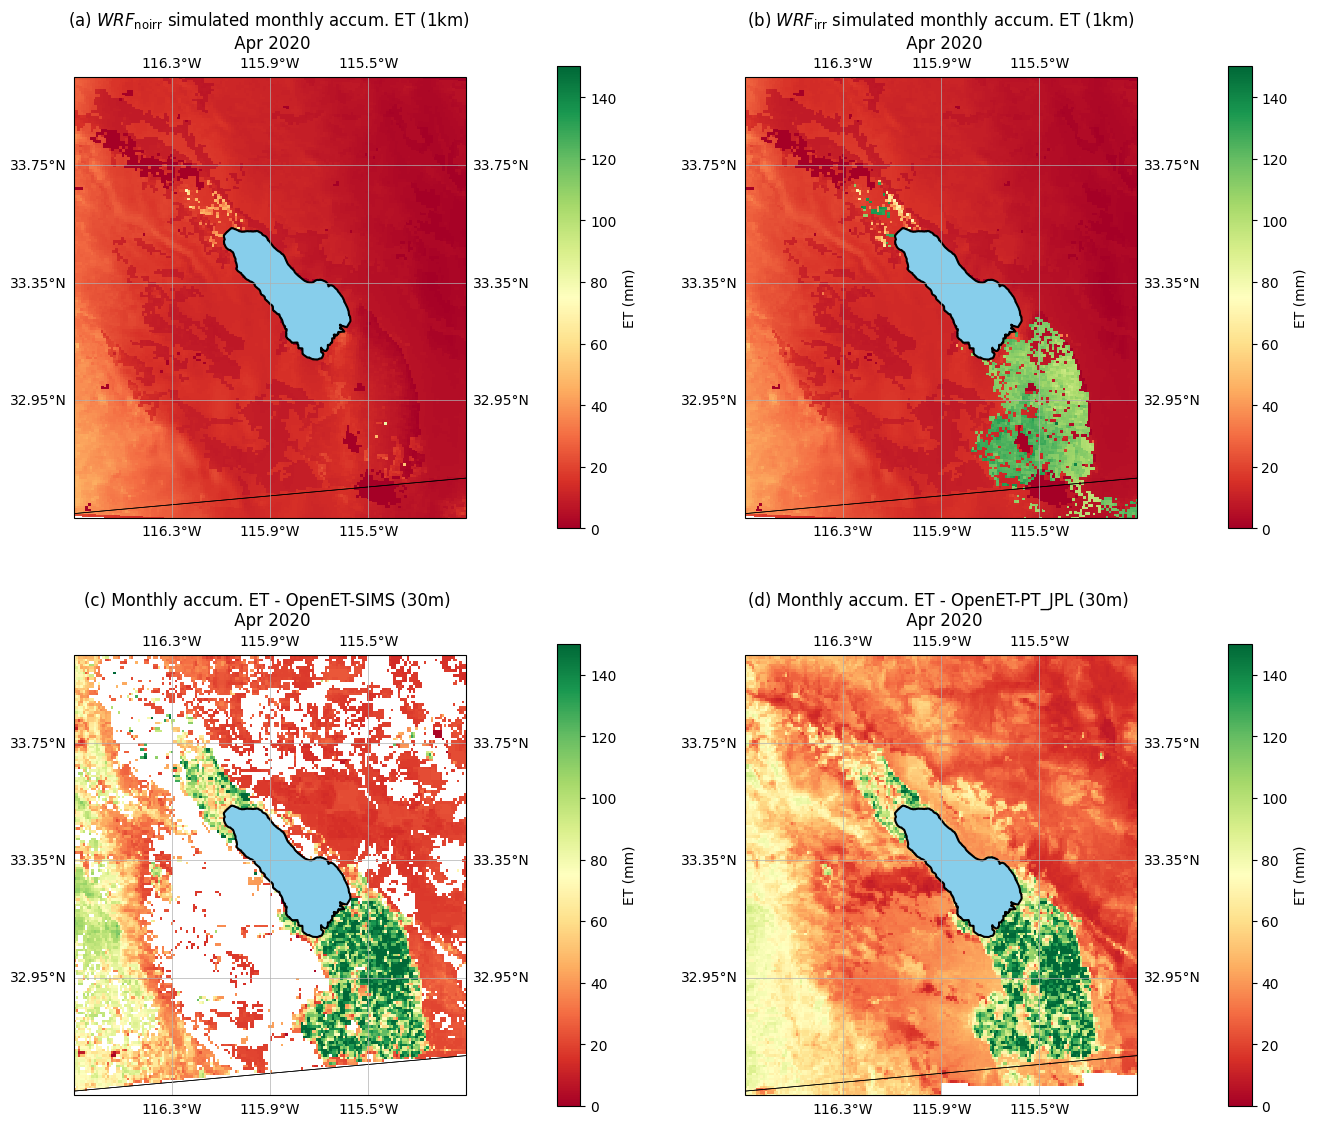

In [ ]:
# figure for paper

fig, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(2, 2, figsize=(16, 15), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.18, hspace=0.0)  # Adjust the width space between subplots

# First subplot
ax_1.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_1 = ax_1.pcolormesh(lon, lat, total_et_monthly_noirr, transform=ccrs.PlateCarree(), cmap='RdYlGn', vmin=0, vmax=150)
counties.plot(ax=ax_1, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_1, linewidth=1.5, color='black', facecolor='skyblue')
#ax_1.gridlines(draw_labels=True)
ax_1.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_1.set_title('(a) $WRF_{\\mathrm{noirr}}$ simulated monthly accum. ET (1km) \n Apr 2020')
cbar_1 = plt.colorbar(mesh_1, ax=ax_1, label='ET (mm)', shrink=0.8, pad=0.16)

ax_2.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_2 = ax_2.pcolormesh(lon, lat, total_et_monthly, transform=ccrs.PlateCarree(), cmap='RdYlGn', vmin=0, vmax=150)
counties.plot(ax=ax_2, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_2, linewidth=1.5, color='black', facecolor='skyblue')
#ax_2.gridlines(draw_labels=True)
ax_2.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_2.set_title('(b) $WRF_{\\mathrm{irr}}$ simulated monthly accum. ET (1km) \n Apr 2020')
cbar_2 = plt.colorbar(mesh_2, ax=ax_2, label='ET (mm)', shrink=0.8, pad=0.16)

ax_3.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_3 = ax_3.pcolormesh(lon_sims, lat_sims, etran_sims, transform=ccrs.PlateCarree(), cmap='RdYlGn', vmin=0, vmax=150)
counties.plot(ax=ax_3, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_3, linewidth=1.5, color='black', facecolor='skyblue')
#ax_3.gridlines(draw_labels=True)
ax_3.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_3.set_title('(c) Monthly accum. ET - OpenET-SIMS (30m) \n Apr 2020')
cbar_3 = plt.colorbar(mesh_3, ax=ax_3, label='ET (mm)', shrink=0.8, pad=0.16)

ax_4.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_4 = ax_4.pcolormesh(lon_sims, lat_sims, etran_jpl, transform=ccrs.PlateCarree(), cmap='RdYlGn', vmin=0, vmax=150)
counties.plot(ax=ax_4, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_4, linewidth=1.5, color='black', facecolor='skyblue')
#ax_4.gridlines(draw_labels=True)
ax_4.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_4.set_title('(d) Monthly accum. ET - OpenET-PT_JPL (30m) \n Apr 2020')
cbar_4 = plt.colorbar(mesh_4, ax=ax_4, label='ET (mm)', shrink=0.8, pad=0.16)


#plt.savefig('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Figures/spatial_ET_comparison_irr_noirr.png', bbox_inches='tight', dpi=300)

#display the plot
plt.show()